<a href="https://colab.research.google.com/github/luisfelipetrj99/ARF_2022-2_EQUIPO_2/blob/main/Ejercicio_3_Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
%load_ext rpy2.ipython
!rm -rf RiesgosFinancieros
!git clone "https://github.com/luisfelipetrj99/ARF_2022-2_EQUIPO_2.git"


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
fatal: destination path 'ARF_2022-2_EQUIPO_2' already exists and is not an empty directory.


#Logit

In [10]:
%%R

incump="ARF_2022-2_EQUIPO_2./202w-2/Tarea 4/Base.csv"

data=read.csv(incump, sep=",", quote="/")

print(head(data))

colors <- c("red", "blue", "darkgreen", "gold", "black")
attach(data)
n<-nrow(data)-1
m=ncol(data)
x=data[,3:m]
y=data[,2]
ylogr = glm(y ~  Liquid  +  Apalanc  +  AscCl  +    Rentab  +Bancos  +  PCP_CT   +  Gop_SD + RetrTMP  +  PLP_PT + IFAudit  +UO_VN + AnOper , family=binomial("logit"))
print(ylogr)
xext=as.matrix(cbind(1,x))
print(head(xext))
summary(ylogr)


R[write to console]: Error in file(file, "rt") : cannot open the connection

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In file(file, "rt") :
R[write to console]: 
 
R[write to console]:  cannot open file 'ARF_2022-2_EQUIPO_2./202w-2/Tarea 4/Base.csv': No such file or directory




Error in file(file, "rt") : cannot open the connection


RInterpreterError: ignored

In [ ]:
%%R
#Réplica de Devianza
print(ylogr$coef)
Llogit=log(prod(((1+exp(-xext%*%as.matrix(ylogr$coef)))^(-1))^y*(1-(1+exp(-xext%*%as.matrix(ylogr$coef)))^(-1))^(1-y)))
DLogit=-2*Llogit
print(DLogit)

print(ylogr$dev)


(Intercept)      Liquid     Apalanc       AscCl      Rentab      Bancos 
  86.096523  -35.347612   63.663052   -7.861229 -395.215718    8.518809 
     PCP_CT      Gop_SD     RetrTMP      PLP_PT     IFAudit       UO_VN 
  47.308495  -73.760760   -9.272432 -102.053079   16.038037 -124.528160 
     AnOper 
  -3.374335 
[1] 1.310612e-08
[1] 1.310611e-08


[1] "Matriz de confusión"
   
y     0   1
  0 126   0
  1   0 121


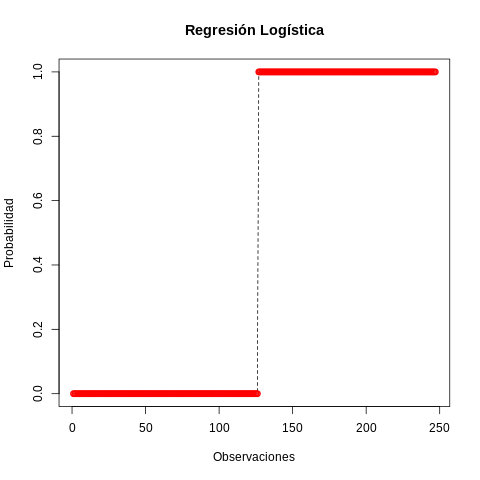

In [ ]:
%%R

ptol=0.5
yest=(1+exp(-xext%*%as.matrix(ylogr$coef)))^(-1)

#print(confusionMatrix(as.factor(y), as.factor(ylogr$fit)))
#matriz de confusión
print("Matriz de confusión")
print(table(y,ifelse(yest<0.5,0,1)))

plot(y,type="l", lty=2, xlab="Observaciones",
  ylab="Probabilidad", main="Regresión Logística")
points(yest, lwd=2, col=colors[1])



#Probit

In [ ]:
%%R
yprobr <- glm(y ~  Liquid  +  Apalanc  +  AscCl  +    Rentab  +Bancos  +  PCP_CT   +  Gop_SD + RetrTMP  +  PLP_PT + IFAudit  +UO_VN + AnOper, family=binomial("probit"))
yprobr
summary(yprobr)


Call:
glm(formula = y ~ Liquid + Apalanc + AscCl + Rentab + Bancos + 
    PCP_CT + Gop_SD + RetrTMP + PLP_PT + IFAudit + UO_VN + AnOper, 
    family = binomial("probit"))

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-4.926e-05  -2.100e-08  -2.100e-08   2.100e-08   4.848e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)  2.471e+01  9.547e+04   0.000    1.000
Liquid      -1.026e+01  2.310e+04   0.000    1.000
Apalanc      1.835e+01  2.157e+04   0.001    0.999
AscCl       -2.292e+00  5.684e+03   0.000    1.000
Rentab      -1.131e+02  2.929e+05   0.000    1.000
Bancos       2.413e+00  1.575e+04   0.000    1.000
PCP_CT       1.390e+01  3.383e+04   0.000    1.000
Gop_SD      -2.059e+01  3.389e+04  -0.001    1.000
RetrTMP     -2.470e+00  3.524e+04   0.000    1.000
PLP_PT      -2.985e+01  1.296e+05   0.000    1.000
IFAudit      4.724e+00  8.143e+03   0.001    1.000
UO_VN       -3.906e+01  2.158e+05   0.000    1.000
AnOper

In [ ]:
%%R
#Comprobación de devianza
print(yprobr$coef)
Lprobit=log(prod((pnorm(xext%*%as.matrix(yprobr$coef),0,1))^y*(1-pnorm(xext%*%as.matrix(yprobr$coef),0,1))^(1-y)))
Dprobit=-2*Lprobit

print(Dprobit)
print(yprobr$dev)


 (Intercept)       Liquid      Apalanc        AscCl       Rentab       Bancos 
  24.7127629  -10.2636723   18.3518939   -2.2920938 -113.1226201    2.4129901 
      PCP_CT       Gop_SD      RetrTMP       PLP_PT      IFAudit        UO_VN 
  13.9003856  -20.5925049   -2.4704686  -29.8456574    4.7245225  -39.0648941 
      AnOper 
  -0.9761072 
[1] 1.276503e-08
[1] 1.276513e-08


[1] "Matriz de confusión"
   
y     0   1
  0 126   0
  1   0 121


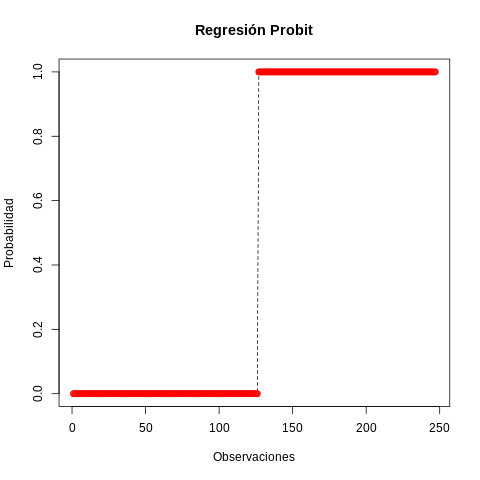

In [ ]:
%%R

ptol=0.5
yest=pnorm(xext%*%as.matrix(yprobr$coef),0,1)

#print(confusionMatrix(as.factor(y), as.factor(ylogr$fit)))
#matriz de confusión
print("Matriz de confusión")
print(table(y,ifelse(yest<0.5,0,1)))

plot(y,type="l", lty=2, xlab="Observaciones",
  ylab="Probabilidad", main="Regresión Probit")
points(yest, lwd=2, col=colors[1])
